# <a href="https://colab.research.google.com/drive/1FuooZGFc0cI7uQ4msTjzouR4Cfh4yQdR?usp=sharing">Click Here</a> to open this file on Google Colab

# <center>**TASK2 (PART-ll)**

# <center>**EXPLORATORY DATA ANALYSIS**</center>

### <center>**EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**

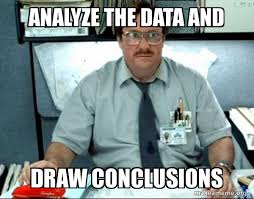 </center>

### **Steps involved in EDA**

###The steps mentioned below are helpful in performing EDA.You are suggested to do it if applicable in the dataset.

- Check the shape of the data frame.
- Check for null values.
- Convert the variables into appropriate data types if there is a mismatch.
- Check for the frequency of different classes in case of a categorical variable.
- Check for distribution of continuous variables

###Below is a checklist to guide you while performing EDA.

- What kind of data do you have?
- What’s missing from the data?
- Where are the outliers?
- How can you add, change or remove features to get more out of your data?
  - Feature Selection
  - Handling missing values
  - Handling skewed data
  - Handling outliers
  - Encoding
  - Feature Scaling

Finally we have the most important question, 
"What question are you trying to solve ?"  
You need to think about questions you can ask of a dataset.  
Questions can be simple as "What is the number of survivors?" or 
"Which gender had a better chance of survival?"  
You goal is to formulate your questions and making inferences.


### **Resources**
Watching:

- [EDA using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ)
- [Feature Selection-How To Drop Features Using Pearson Correlation](https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2)


Reading:

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Skewness in Machine Learning](https://beingdatum.com/handling-skewness-in-machine-learning/)
- [Transforming Skewed Data for Machine Learning](https://opendatascience.com/transforming-skewed-data-for-machine-learning/)
- [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [Box Plot Diagram to Identify Outliers](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)
- [Convert a categorical variable to a number for Machine Learning Model Building](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


In [1]:
# run this cell before proceeding further
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2021-07-10 07:02:12--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2021-07-10 07:02:13 (7.09 MB/s) - ‘titanic.csv.3’ saved [61194/61194]



*Make sure to run the above cell before loading the data*

Use the 'titanic.csv' dataset for the questions in this section.

#### **Using the concepts learnt till now perform EDA on the titanic datset**.

#### The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods.
**With Titanic dataset analysis draw minimum 5 conclusions from  and also answer the following questions .**

1)What is the overall passengers survival ratio?

2)Which groups have higher chances for survival?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")     
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing the shape of data, the type of data , the missing values , unique counts , and building a data dictionary dataframe.

In [3]:
titanic.shape

(891, 12)

In [4]:
# Creating the Data Dictionary with first column being datatype.
titanic_dict = pd.DataFrame(titanic.dtypes)
titanic_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
# identifying the missing values from the dataset.

titanic_dict['MissingVal'] = titanic.isnull().sum()
titanic_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [6]:
#checking which columns are containing null values and which are not 
# True means column contains null value , False means column does not contains any type of null value
print(titanic.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [7]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
titanic_dict['UniqueVal'] = titanic.nunique()
titanic_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [8]:
# identifying count of the variable.
titanic_dict['Count'] = titanic.count()
titanic_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [9]:
# renaming the first column using rename()
titanic_dict = titanic_dict.rename(columns = {0:'DataType'})
titanic_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In our data we have 177 Ages missing from the Data
And also some outliers. We have to clean this data later!


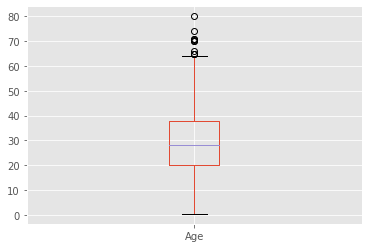

In [10]:
print("In our data we have", titanic.Survived.count() - titanic.Age.count(), "Ages missing from the Data")
print("And also some outliers. We have to clean this data later!")
titanic.Age.plot.box()
plt.show()

We dont have any missing data here -> 891
We have some outliers at the first sight


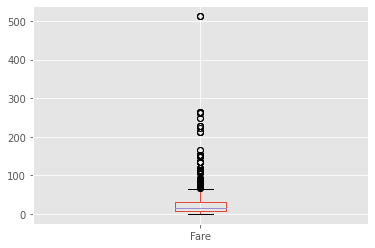

In [11]:
print("We dont have any missing data here ->", titanic.Fare.count())
print("We have some outliers at the first sight")
titanic.Fare.plot.box()
plt.show()


# Data Cleanup

I see that there are some missing values in ‘Age’, ‘Cabin’ and ‘Embarked’ columns. I’ll not use ‘Cabin’ which is the most missing and will ignore it. There are some columns which are not required in my analysis so I will drop them. For the missing ‘Ages’ and ‘Embarked’ I will omit those rows when I use the data.



In [12]:
titanic_cleaned = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Discriptive statistics on objects and other numerical datatypes.

In [14]:
# discriptive statistics on "objects" datatypes
titanic.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [15]:
# get discriptive statistics on "number" datatypes
titanic.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Applying Univariate and Multivariate Data Analysis using graphical representations

# Univariate Data Analysis

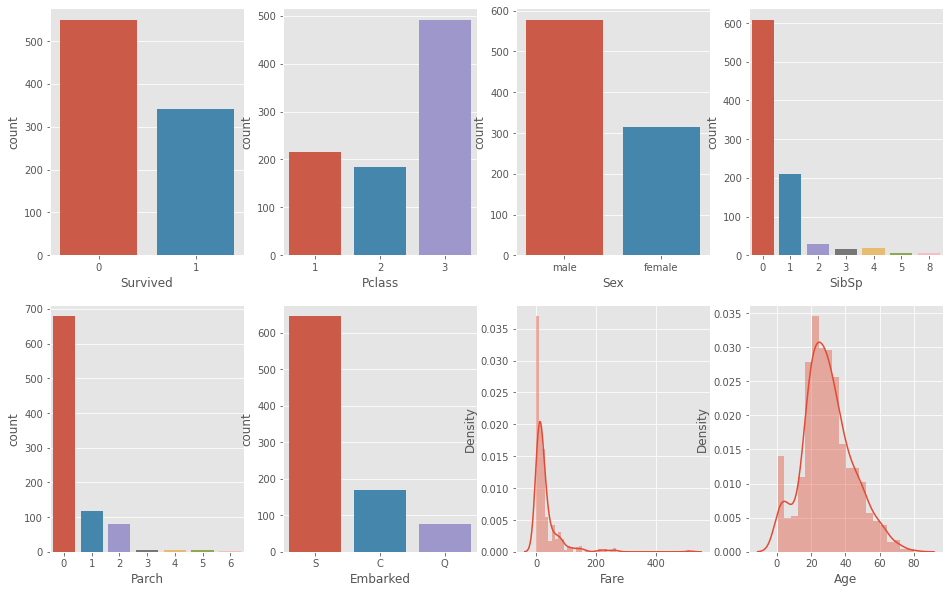

In [16]:
ig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = titanic, ax = axes[0,0])
sns.countplot('Pclass' , data = titanic, ax = axes[0,1])
sns.countplot('Sex' , data = titanic, ax = axes[0,2])
sns.countplot('SibSp' , data = titanic, ax = axes[0,3])
sns.countplot('Parch' , data = titanic, ax = axes[1,0])
sns.countplot('Embarked' , data = titanic, ax = axes[1,1])
sns.distplot(titanic['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(titanic['Age'].dropna() , kde = True , ax = axes[1,3])

# Bivariate Data Analysis

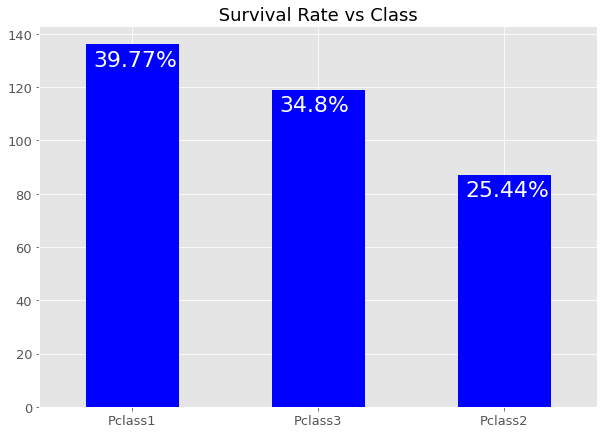

In [17]:
Pclass_survival = titanic[titanic.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# creating a list to collect the plt.patches data
totals = []

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# setting individual bar lables using above list
total = sum(totals)

# setting individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

# Joint Plot

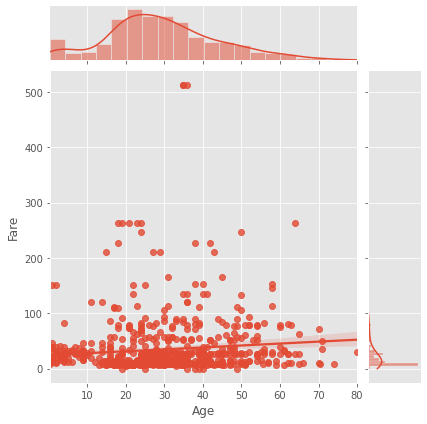

In [18]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = titanic, kind = 'reg');

# Multivariate Data Analysis

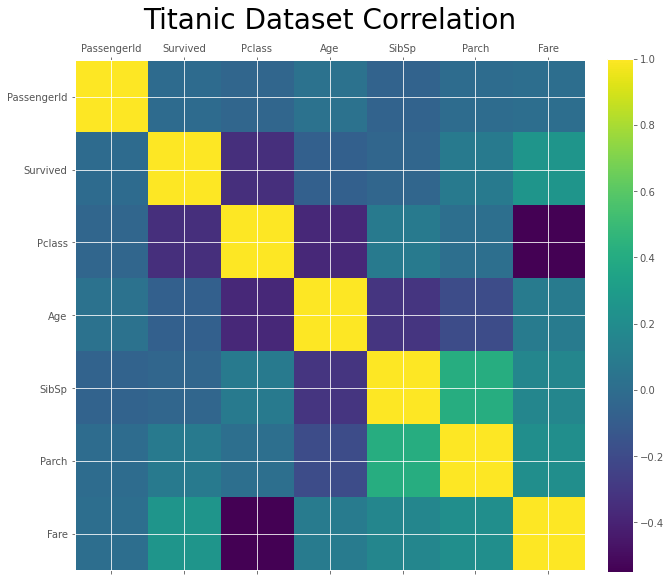

In [19]:
# For multivariate data analysis  used pandas "correlation matrix" .  can also use seaborn "heatmap".
def plotting_corr( titanic , size = 10):
    corr = titanic.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(titanic , size = 10)

There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

# Q1. How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r

In [20]:
titanic_cleaned.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From above correlation table we can see that Survival is inversly correlated to Pclass value. In our case since Class 1 has lower numerical value, it had better survival rate compared to other classes.

We also see that Age and Survival are slighltly correlated.

Q2. Did Sex play a role in Survival ?

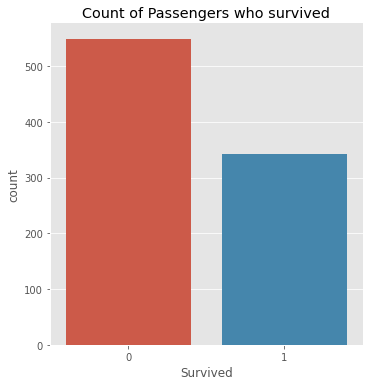

In [21]:
#a histogram of ‘Survived’ column.
sns.factorplot('Survived', data=titanic, kind='count')
plt.title('Count of Passengers who survived')
plt.show()

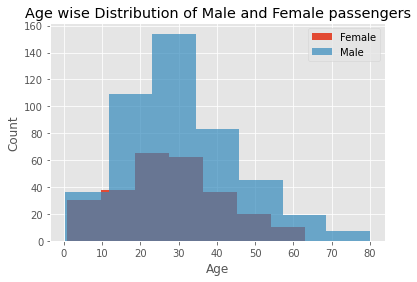

In [22]:
#Age wise Distribution of Male and Female passengers
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()
plt.show()

There were many male passengers aboared compared to female passengers.

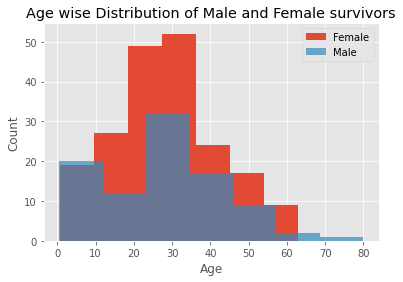

In [23]:
#Age wise Distribution of Male and Female survivors
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()
plt.show()

From above visualization, it is evident that Women had better survival chance

In [24]:
# a look for youngest and oldest passenger to survive
yougest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].min()
youngest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].min()
oldest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].max()
oldest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].max()

print ("Yougest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}".format(yougest_survive, youngest_die, oldest_survive, oldest_die))

Yougest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


# Q3. Did class played role in survival ?

In [25]:
grouped_by_pclass = titanic_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [26]:
titanic_cleaned.groupby(['Pclass', 'Sex']).describe()

Survived                      ...      Fare                      
                 count      mean       std  ...       50%         75%       max
Pclass Sex                                  ...                                
1      female     94.0  0.968085  0.176716  ...  82.66455  134.500000  512.3292
       male      122.0  0.368852  0.484484  ...  41.26250   78.459375  512.3292
2      female     76.0  0.921053  0.271448  ...  22.00000   26.062500   65.0000
       male      108.0  0.157407  0.365882  ...  13.00000   26.000000   73.5000
3      female    144.0  0.500000  0.501745  ...  12.47500   20.221875   69.5500
       male      347.0  0.135447  0.342694  ...   7.92500   10.008300   69.5500

[6 rows x 40 columns]

In [27]:
#usimg pandas groupby function to segregate passengers according to their class.
titanic_cleaned.groupby(['Pclass'])['Survived'].sum()/titanic_cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

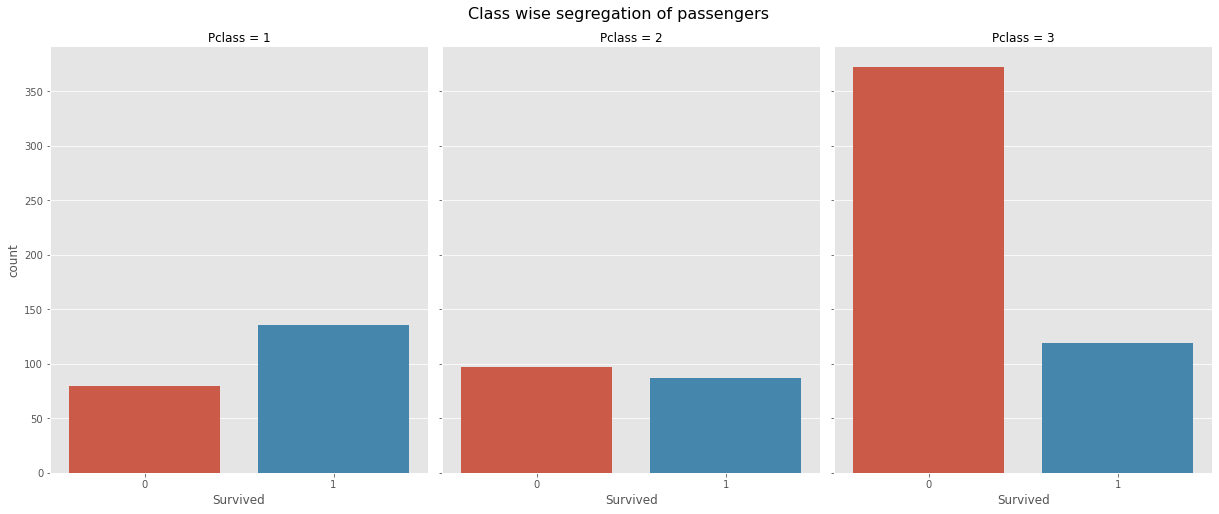

In [28]:
#visualizing
sns.factorplot('Survived', col='Pclass', data=titanic_cleaned, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)
plt.show()

 I see Class did play role in survival of the passengers.

Above visualization compares passengers who survived the tragedy and who did not, across three classes. We can also drill down further to visualize survival of passengers of both genders across 3 classes.

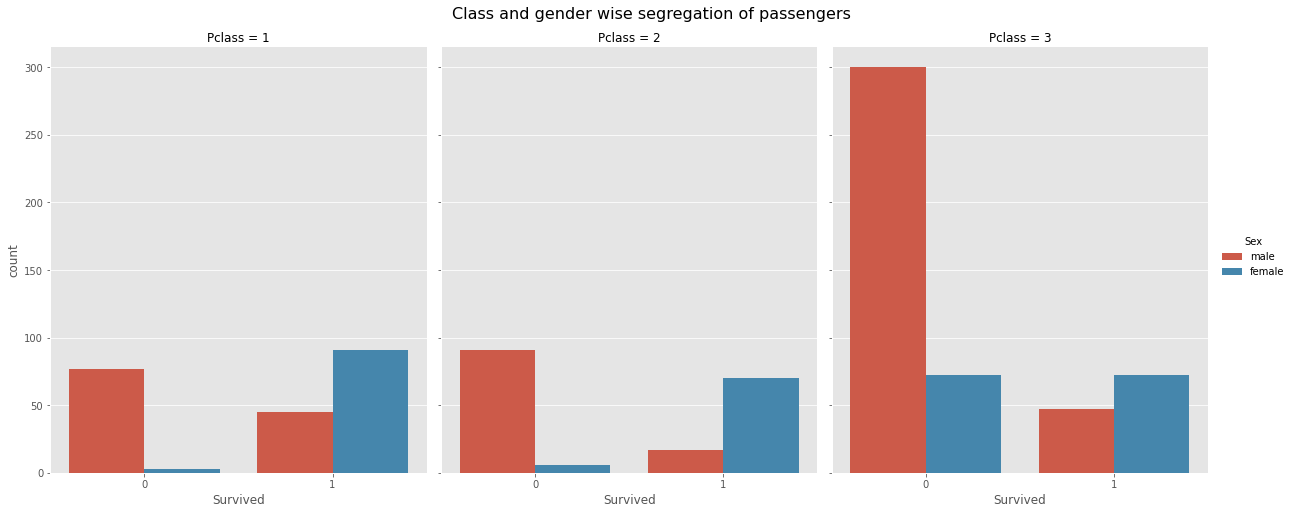

In [29]:
sns.factorplot('Survived', col='Pclass', hue='Sex', data=titanic_cleaned, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)
plt.show()

From above visualization we can see that class played important for Survival of Male and Female passengers.

# Q4. How fare is related to Age, Class and Port of Embarkation ?
# Q5. How Embarkation varied across different ports ?

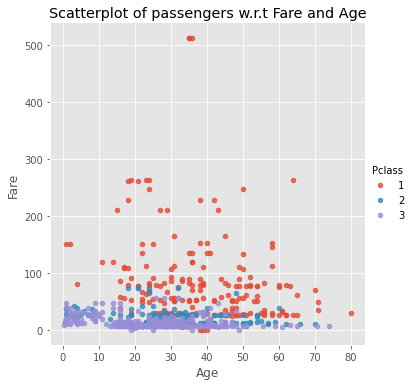

In [30]:
sns.lmplot('Age', 'Fare', data=titanic_cleaned, fit_reg=False, hue="Pclass", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')
plt.show()

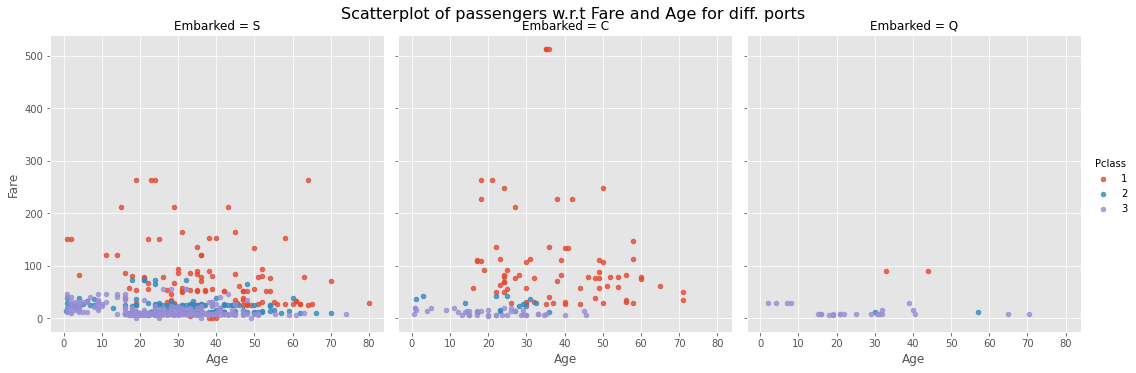

In [31]:
#segregating the passengers according to thier Port of Embarkation and then comparing Fare v/s Age across 3 classes.
sns.lmplot('Age', 'Fare', data=titanic_cleaned, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)
plt.show()

From above visualization we can see that Fare is quite uniform for Class 2 and 3 across all ages.We can also observe that lot of passengers embarked from port of Southampton.

# Answer to the Questions Asked Above

# 1)What is the overall passengers survival ratio?

In [32]:
survived_data = titanic[titanic['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print('\033[1mThe overall passengers survival ratio is {}'.format(survival_percent),"%") # \033[1m to make the line bold. 
                                                                                         # boldness not vivible while viewing on github

The overall passengers survival ratio is 38.38383838383838 %


**Conclusion : The overall passengers survival ratio is 38.38383838383838 %**

# 2)Which groups have higher chances for survival?

# By Gender

In [33]:
genderSurvival = pd.crosstab(titanic['Survived'],titanic['Sex'])
genderSurvival
# 0 means not survived and 1 means survived

Sex,female,male
Survived,,
0,81,468
1,233,109


Proportion of survivors by Gender :

In [34]:
titanic.groupby('Sex').Survived.mean() #Grouping by sex and finding survived mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Conclusion : Female Passengers have higher chances for survival**

# By Pclass

In [35]:
classSurvival = pd.crosstab(titanic['Survived'],titanic['Pclass'])
classSurvival
# 0 means not survived and 1 means survived

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Proportion of survivors by Pclass:

In [36]:
titanic.groupby('Pclass').Survived.mean()  #Grouping by pclass and finding survived mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Conclusion : Pclass 1 Passengers have higher chances for survival**

# By Age

In [37]:
# binning ages
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic['age_group'] = pd.cut(titanic.Age, range(0, 81, 10), right=False, labels=age_labels)

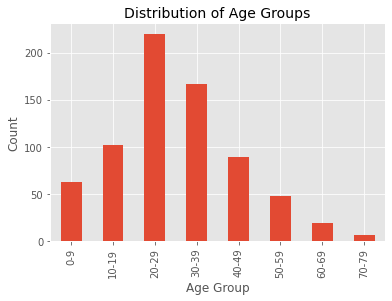

In [38]:
titanic.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

From the plot above we can see that the majority of passengers were aged between 20-29

Proportion of survivors by age group :

In [39]:
titanic.groupby(['age_group']).Survived.mean()  #Grouping by age group and finding survived mean

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

**Conclusion : Passengers aged between 0-9 have the higher chances for survival**

# Submitted By : <a href="https://www.linkedin.com/in/saurabh-satapathy-692a6a1b9">Saurabh Satapathy</a> 